# SOCG 206 Homework #1
## Due April 24th Midnight
### You must complete the entire assignment in Stata. Homework submission must include do-file, log-file, and word file. Your do file should be organized based on question.

## Question 1
In class, we cleaned the Prison Policy Initiative of total populations across racial/ethnic groups. This data comes from this site: https://www.prisonpolicy.org/data/ and is titled "U.S. Census group quarters (2010): People housed in correctional facilities for adults, by race and by gender." Open the excel and observe the data. In class we specifically looked at the "Total" sheet that shows the total persons in correctional facilities. For question #1, I want you to practice cleaning a dataset using "Women" sheet.

* Look up the exact code we used in class (workbook 2) to open the Prison Policy Iniative data for the Total Population (under sheet "Total"). Edit the code to specify the sheet Women and run the code to open the data.
* Observe the data. We want to make a Black women to White women ratio of incarceration people at the state-level. Therefore, we need to clean the data (it is very similar to what we did in class workbook 2). Get rid of unnecessary observations. Rename the variables to reflect what they are measuring. We only want to keep the state, Black women, and White women variables.
* Write a code that shows the summary statistics for incarcerated Black and White women.
* Create a new variable that is the ratio of Black incarcerated women to White incarcerated women.
* Save your data.

In [9]:
************************************************
************ QUESTION ONE   ********************
************************************************
*set-up directoary
cd "D:\documents copy\teaching\SOC 206 Spring 2024\homeworks\homework1"

*First, you must read in the file from the web.
import excel "https://www.prisonpolicy.org/data/race_ethnicity_gender_2010.xlsx", ///
    sheet(Women) clear

*Second, you drop the observations or rows that are not necessary.
drop in 59
drop in 1/4

*Third, you only want to keep the information about racial and ethnic identity. So you drop the rest of the variables.
keep A B C D E F

*Fourth, you need to rename the variables with useful names
rename A geoid
rename B geoid2
rename C state
rename D tot_incar
rename E wht_incar
rename F blk_incar

*Row 1 just has the variable names so you can drop it now that you are done cleaning
drop in 1

*Drop United States and Puerto Rico
drop if state=="United States" | state=="Puerto Rico"


D:\documents copy\teaching\SOC 206 Spring 2024\homeworks\homework1


(1 observation deleted)

(4 observations deleted)








(1 observation deleted)

(2 observations deleted)


In [10]:
* cleans the data
destring tot_incar wht_incar blk_incar, replace

tot_incar: all characters numeric; replaced as int
wht_incar: all characters numeric; replaced as int
blk_incar: all characters numeric; replaced as int


In [11]:
*descriptive statistics
tabstat tot_incar wht_incar blk_incar, stat(mean median min max)


   stats |  tot_in~r  wht_in~r  blk_in~r
---------+------------------------------
    mean |  3987.922  2477.078  1138.667
     p50 |      2545      1533       625
     min |       160        46         6
     max |     25974     16643      7410
----------------------------------------


In [12]:
*generates new ratio variable
gen incar_ratio=blk_incar/wht_incar

In [13]:
*descriptive statistics
tabstat tot_incar wht_incar blk_incar incar_ratio, stat(mean median min max)


   stats |  tot_in~r  wht_in~r  blk_in~r  incar_~o
---------+----------------------------------------
    mean |  3987.922  2477.078  1138.667  .5440997
     p50 |      2545      1533       625  .3326517
     min |       160        46         6  .0147059
     max |     25974     16643      7410  8.391304
--------------------------------------------------


In [14]:
desc


Contains data
  obs:            51                          
 vars:             7                          
 size:         5,100                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
geoid           str64   %64s                  
geoid2          str6    %9s                   
state           str20   %20s                  
tot_incar       int     %10.0g                
wht_incar       int     %10.0g                
blk_incar       int     %10.0g                
incar_ratio     float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [15]:
save "women_incar.dta",replace

file women_incar.dta saved


## Question 2
This question will have you practice prepare and conduct data for regression analysis. 

* In Canvas, there is a state-level data titled "state_variables". Using state as the key variable, merge the state-level with the incarcerated data from question 1.
* Write a regression equation where BW incarceration ratio is the dependent variable. Use the following independent variables BW median household income ratio, BW educational attainment ratio, and segregation index. Then estimate the equation. Write your findings, specifically write about each beta cofficient.
* Review the regression diagnostics (workbook 2): linearity of the parameters, normality of the errors, homoscedasticity, and multicollinearity. Write your assessment of the regression diagnostics. 

In [27]:
use "women_incar.dta",clear

In [28]:
* merges existing data with statedata.dta
merge 1:1 state using "D:\documents copy\teaching\SOC 206 Spring 2024\homeworks\homework1\state_data_clean\state_variables.dta"


    Result                           # of obs.
    -----------------------------------------
    not matched                             3
        from master                         1  (_merge==1)
        from using                          2  (_merge==2)

    matched                                50  (_merge==3)
    -----------------------------------------


In [30]:
*We see that not everything merged; we should see if it is alarming
list if _merge<3


     +-------------------------------------------------------------------+
  9. |       geoid | geoid2 |                state | tot_in~r | wht_in~r |
     | 0400000US11 |     11 | District of Columbia |      463 |       46 |
     |-------------------------------------------------------------------|
     | blk_in~r | incar_~o | mhincr~o |     diss |     isol  | segscale  |
     |      386 | 8.391304 |        . |        . |        .  |        .  |
     |-------------------------------------------------------------------|
     |      eduratio      |      region      |               _merge      |
     |             .      |                  |      master only (1)      |
     +-------------------------------------------------------------------+

     +-------------------------------------------------------------------+
 52. |       geoid | geoid2 |                state | tot_in~r | wht_in~r |
     |             |        | District Of Columbia |        . |        . |
     |-----------------

In [33]:
*So re-open file
use "women_incar.dta",clear
replace state="District Of Columbia" if state=="District of Columbia"



(1 real change made)


In [34]:
* merges existing data with statedata.dta
merge 1:1 state using "D:\documents copy\teaching\SOC 206 Spring 2024\homeworks\homework1\state_data_clean\state_variables.dta"


    Result                           # of obs.
    -----------------------------------------
    not matched                             1
        from master                         0  (_merge==1)
        from using                          1  (_merge==2)

    matched                                51  (_merge==3)
    -----------------------------------------


In [35]:
regress incar_ratio mhincratio segscale eduratio


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(3, 47)        =    796.51
       Model |   66.002951         3  22.0009837   Prob > F        =    0.0000
    Residual |  1.29822269        47  .027621759   R-squared       =    0.9807
-------------+----------------------------------   Adj R-squared   =    0.9795
       Total |  67.3011737        50  1.34602347   Root MSE        =     .1662

------------------------------------------------------------------------------
 incar_ratio |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  mhincratio |   .0933829   .0882276     1.06   0.295     -.084108    .2708739
    segscale |  -.0312157    .003257    -9.58   0.000    -.0377679   -.0246634
    eduratio |   1.600359   .0418421    38.25   0.000     1.516183    1.684534
       _cons |   .3238469   .2653115     1.22   0.

* The dependent variable represents BW inequality among incarcerated women where higher number means greater incacerated Black women as compared to incarcerated white women.
* Black-white median household income ratio is positive and not significant meaning higher Black-white income inequality leads to higher Black-white women incarcerated women. This is expected but not significant.
* Segregation scale means higher Black-white segregation. We find that segregation scale is negative and significant meaning as segregation scale increases there is a decrease in Black-white women incarceration. This is counter-intiative.
* Black-white lack of education attainment is positive and signifcant meaning states with higher lack of educational attainment report higher Black-white women incarcerated ratios. This is expected.

In [36]:
*makes residuals
predict r, resid

(1 missing value generated)


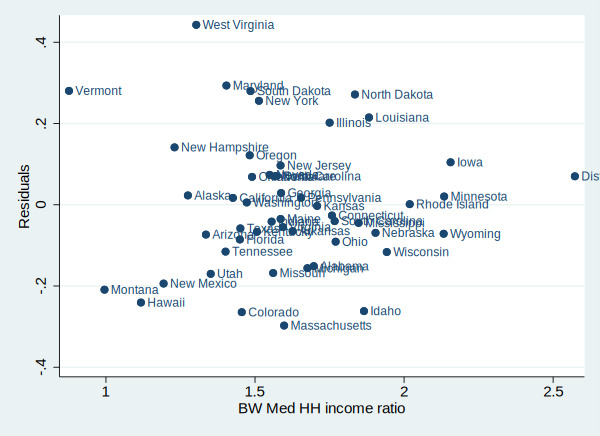

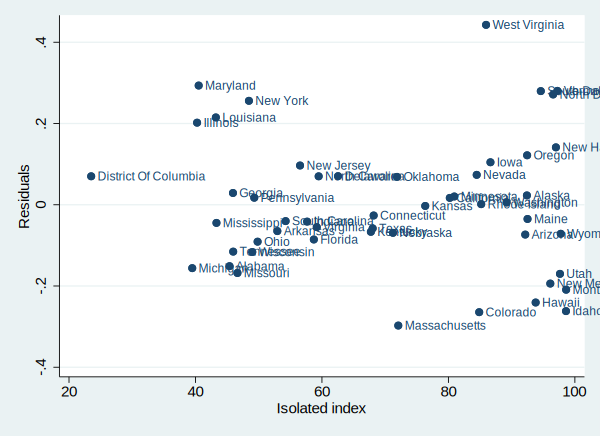

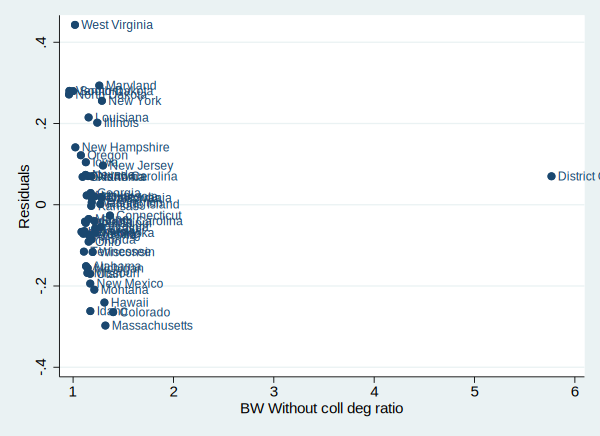

In [37]:
*Linearity
scatter r mhincratio, mlabel(state)
scatter r isol, mlabel(state)
scatter r eduratio, mlabel(state)

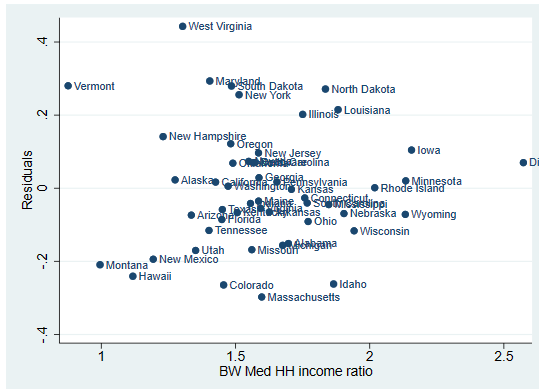

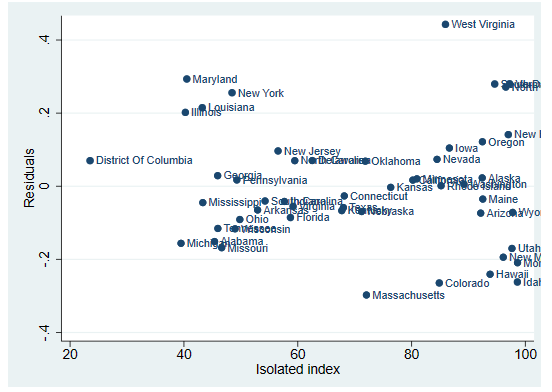

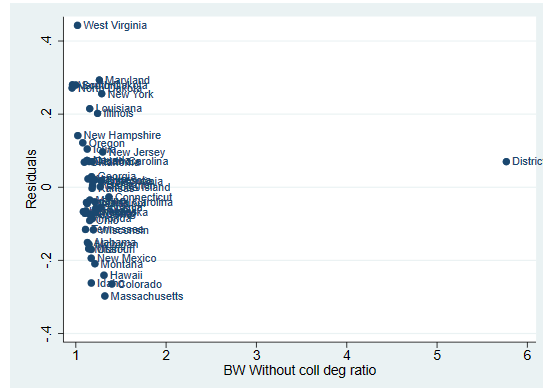

District of columbia is a outlier noted in lack of educational attainment noted.

In [38]:
*Normality
swilk r


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
           r |         51    0.97067      1.401     0.720    0.23568


The Shapiro-Wilk test indicates we fail to reject the hypothesis that r is normally distribution.

In [39]:
*Homoscedasticity
estat imtest
estat hettest



Cameron & Trivedi's decomposition of IM-test

---------------------------------------------------
              Source |       chi2     df      p
---------------------+-----------------------------
  Heteroskedasticity |      12.70      9    0.1767
            Skewness |       5.09      3    0.1652
            Kurtosis |       0.00      1    0.9579
---------------------+-----------------------------
               Total |      17.79     13    0.1655
---------------------------------------------------


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of incar_ratio

         chi2(1)      =     1.15
         Prob > chi2  =   0.2842


The Cameron & Trivedi and Breusch-Pagan does not show heterskedastcity. We fail to reject the hypothesis of constant variance.

In [40]:
*Multicollinearity
vif


    Variable |       VIF       1/VIF  
-------------+----------------------
    eduratio |      1.34    0.746321
  mhincratio |      1.30    0.768464
    segscale |      1.12    0.894298
-------------+----------------------
    Mean VIF |      1.25


The reported VIF of the independent variables are close to 1 and within field's standards (VIF < 10).

In [41]:
save "women_incar_state.dta",replace

(note: file women_incar_state.dta not found)
file women_incar_state.dta saved


## Question 3
Questions 3-5 are for you to practice interactions.
* Using the same data from Questions 1 and 2, use the xtile command to make do-tile of the BW median household income ratio.
* Write and run a regression equation where BW incarceration ratio is the dependent variable. Use the following independent variables: BW educational attainment ratio, segregation index, BW median household income (do-tile), region, and interaction term of BW median household income (do-tile) and region. Describe your findings.
* Graph the predictive values across the interaction groups using the margins plot command. Describe what you found in the margins plot and connect it back to your regression results.

In [42]:
use "women_incar_state.dta",clear

In [43]:
xtile mhincratio_do=mhincratio, nq(2) 

In [44]:
tab mhincratio_do


2 quantiles |
         of |
 mhincratio |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         26       50.00       50.00
          2 |         26       50.00      100.00
------------+-----------------------------------
      Total |         52      100.00


In [45]:
gen region_numeric=.
replace region_numeric=1 if region=="Northeast"
replace region_numeric=2 if region=="Midwest"
replace region_numeric=3 if region=="South"
replace region_numeric=4 if region=="West"


(52 missing values generated)

(9 real changes made)

(12 real changes made)

(18 real changes made)

(13 real changes made)


In [47]:
regress incar_ratio c.segscale c.eduratio i.region_numeric##i.mhincratio_do


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(9, 41)        =    316.80
       Model |  66.3471098         9  7.37190109   Prob > F        =    0.0000
    Residual |  .954063948        41  .023269852   R-squared       =    0.9858
-------------+----------------------------------   Adj R-squared   =    0.9827
       Total |  67.3011737        50  1.34602347   Root MSE        =    .15254

-------------------------------------------------------------------------------
  incar_ratio |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
     segscale |  -.0241068   .0046797    -5.15   0.000    -.0335578   -.0146559
     eduratio |   1.632832   .0353964    46.13   0.000     1.561348    1.704317
              |
region_nume~c |
           2  |  -.1609508   .1247564    -1.29   0.204    -.4129014    .0909998
           3

* The dependent variable represents BW inequality among incarcerated women where higher number means greater incacerated Black women as compared to incarcerated white women.
* Segregation scale where higher isolation means higher Black-white segregation. We find that segregation scale is negative and significant meaning as segregation scale increases there is a decrease in Black-white women incarceration. This is counter-intiative.
* Black-white lack of education attainment is positive and signifcant meaning states with higher lack of educational attainment report higher Black-white women incarcerated ratios. This is expected.
* We find lower Black-white incarcerated women in Midwest, South, and West AS COMPARED to the Northeast. However, the West (3) is the one significant. 
* The high Black-white median household income ratio is negative and significant for Black-white women incarcerated AS COMPARED to low Black-white income inequality. This is expected but not significant.
* The interaction reference is northeast states with lower Black-white median household income. We find positive, marginally significant (p=.099) interaction for Midwest with higher Black-white income inequality as compared to northwest with lower Black-white income inequality. The south region with higher Black-white income inequality report marginally signifcant (p=.095) increase of Black-white women incarcerated as compared to northeast with lower Black-white income inequality. The west region with higher Black-white income inequality reports a non-significant increase in Black-white women incarcerated as compared to the reference category. 

In [48]:
*The margins predicts
margins region_numeric#mhincratio_do, atmeans


Adjusted predictions                            Number of obs     =         51
Model VCE    : OLS

Expression   : Linear prediction, predict()
at           : segscale        =    62.39505 (mean)
               eduratio        =    1.261229 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               1.mhincra~do    =    .4901961 (mean)
               2.mhincra~do    =    .5098039 (mean)

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
region_nume~c#|
mhincratio_do |
         1 1  |   .7125113   .0897348     7.94   0.000     .5312881    .8937345
         1 2  |   .4908406   .0639036     7.68 


  Variables that uniquely identify margins: region_numeric mhincratio_do


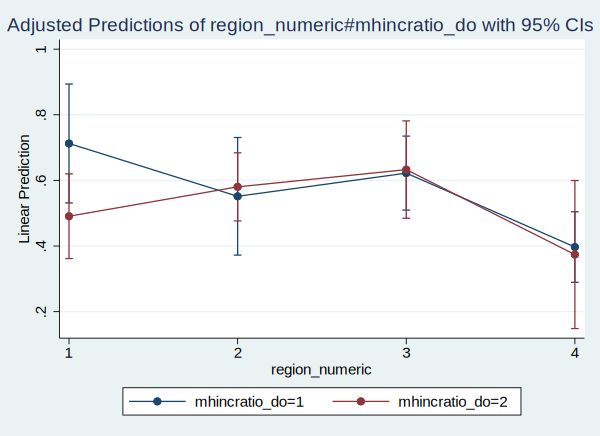

In [49]:
marginsplot

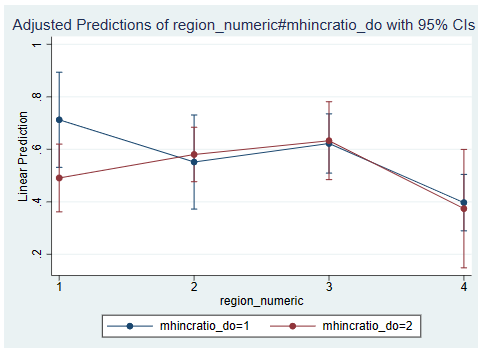

We see higher Black-white women incarcerated for regions Midwest and South for states with higher Black-white income inequality. Our model predicts higher Black-white women incarcerated for regions Northeast and West for states with lower Black-white income inequality. However, none of the interactions are significant.

## Question 4
* Using the same data from Questions 3.
* Write and run a regression equation where BW incarceration ratio is the dependent variable. Use the following independent variables: BW educational attainment ratio, segregation index, BW median household income (continous), region, and interaction term of BW median household income (continous) and region. Describe your findings.
* Graph the predictive values across the interaction groups using the margins plot command. Describe what you found in the margins plot and connect it back to your regression results.

In [50]:
regress incar_ratio c.segscale c.eduratio i.region_numeric##c.mhincratio


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(9, 41)        =    307.13
       Model |  66.3175056         9  7.36861174   Prob > F        =    0.0000
    Residual |    .9836681        41  .023991905   R-squared       =    0.9854
-------------+----------------------------------   Adj R-squared   =    0.9822
       Total |  67.3011737        50  1.34602347   Root MSE        =    .15489

-------------------------------------------------------------------------------
  incar_ratio |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
     segscale |  -.0237156   .0048374    -4.90   0.000    -.0334848   -.0139463
     eduratio |   1.610585   .0645702    24.94   0.000     1.480182    1.740987
              |
region_nume~c |
           2  |  -.3699952   .4819553    -0.77   0.447    -1.343324    .6033333
           3

* The dependent variable represents BW inequality among incarcerated women where higher number means greater incacerated Black women as compared to incarcerated white women.
* Segregation scale means higher segregations scale means higher Black-white segregation. We find that segregation scale is negative and significant meaning as segregation scale increases there is a decrease in Black-white women incarceration. This is counter-intiative.
* Black-white lack of education attainment is positive and signifcant meaning states with higher lack of educational attainment report higher Black-white women incarcerated ratios. This is expected.
* We find lower Black-white incarcerated women in Midwest, South, and West AS COMPARED to the Northeast. However, only the west region is significant. 
* Black-white median household income ratio is negative and not significant meaning lower Black-white income inequality leads to higher Black-white women incarcerated women.  This is expected but not significant.
* The region reference is northeast states. We find positive, non-significant interaction for Midwest and Black-white income inequality meaning greater Black-white incarcerated women as for states in northeast with higher Black-white income inequalit.  The south region interaction is positive and non-significant meaning greater Black-white incarcerated women as Black-white income inequality increases as compared to northeast region. Finally, the west region is positive and non-significant meaning greater Black-white incarcerated women as Black-white income inequality increases in west as compared to northeast states.

In [51]:
tabstat mhincratio isol eduratio, stat(mean min max)


   stats |  mhinc~io      isol  eduratio
---------+------------------------------
    mean |  1.590427  70.45619  1.261722
     min |    .87604  23.50731  .9592309
     max |  2.572936  98.61682   5.76691
----------------------------------------


In [52]:
margins region_numeric, at(mhincratio=(.5(.5)3))  atmeans


Adjusted predictions                            Number of obs     =         51
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : segscale        =    62.39505 (mean)
               eduratio        =    1.261229 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               mhincratio      =          .5

2._at        : segscale        =    62.39505 (mean)
               eduratio        =    1.261229 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               mhincratio      =           1

3._at        : segscale        =    62.39505 (mean)
               eduratio        =    1.261229 (mean)
               1.region_n~c    =   


  Variables that uniquely identify margins: mhincratio region_numeric


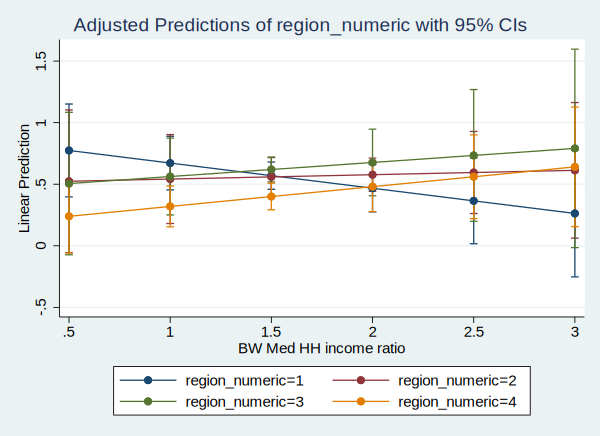

In [53]:
marginsplot

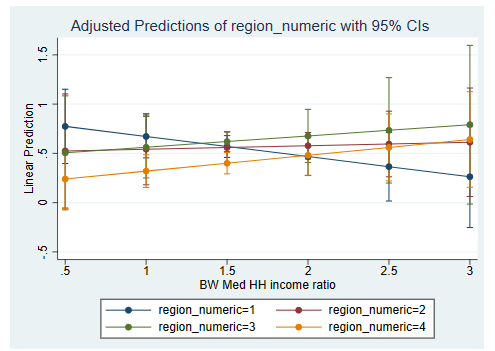

* We see a negative slope for Northeast states meaning as Black-white income inequality increases there is a decrease in Black-white incarcerated women. 
* We see a positive slope for Midwest, South, and West meaning as Black-white income inequality increases there is increase in Black-white incarcated women inequality.
* Northeast appears to have steepest slope. Below we can calculate the slopes with margins command



Conditional marginal effects                    Number of obs     =         51
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : mhincratio
at           : segscale        =    62.39505 (mean)
               eduratio        =    1.261229 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               mhincratio      =    1.601328 (mean)

-------------------------------------------------------------------------------
              |            Delta-method
              |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
mhincratio    |
region_nume~c |
           1  |  -.2045462   .1711952    -1.19   0.239    -.5502819    .1411895
           2  |   .0354696   .2206481     0.16   0.873    -.4101382    .

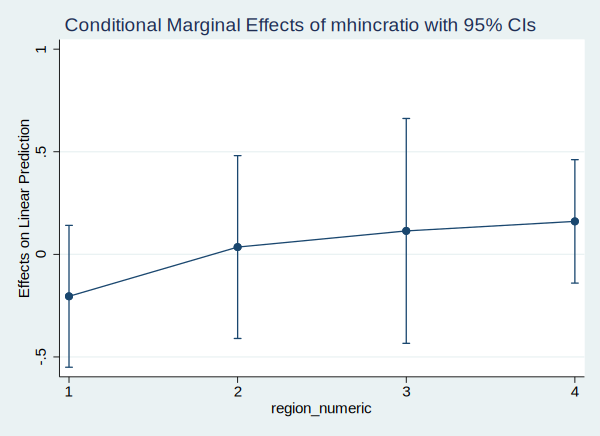

In [55]:
margins region_numeric, dydx(mhincratio) atmeans vsquish
marginsplot

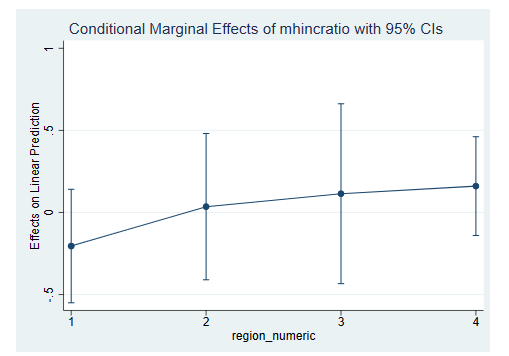

This reports the slopes, we see Northeast has the steeper slope (-.205).

## Question 5
* Using the same data from Questions 3.
* Write and run a regression equation where BW incarceration ratio is the dependent variable. Use the following independent variables: BW educational attainment ratio, segregation index, BW median household income (continous), region, and interaction term of BW median household income (continous) and BWeducation attainment. Describe your findings.
* Graph the predictive values across the interaction groups using the margins plot command. Describe what you found in the margins plot and connect it back to your regression results.

In [56]:
regress incar_ratio c.segscale i.region_numeric c.eduratio##c.mhincratio


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(7, 43)        =    458.12
       Model |  66.4106757         7  9.48723939   Prob > F        =    0.0000
    Residual |   .89049797        43  .020709255   R-squared       =    0.9868
-------------+----------------------------------   Adj R-squared   =    0.9846
       Total |  67.3011737        50  1.34602347   Root MSE        =    .14391

-------------------------------------------------------------------------------
  incar_ratio |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
     segscale |  -.0278542   .0041891    -6.65   0.000    -.0363024   -.0194061
              |
region_nume~c |
           2  |  -.0409466   .0694744    -0.59   0.559    -.1810552    .0991619
           3  |   .0047117    .074875     0.06   0.950    -.1462882    .1557116
           4

* The dependent variable represents BW inequality among incarcerated women where higher number means greater incacerated Black women as compared to incarcerated white women.
* Segregation scale where higher segregation means higher Black-white segregation. We find that segregation scale is negative and significant meaning as segregation scale increases there is a decrease in Black-white women incarceration. This is counter-intiative.
* Black-white lack of education attainment is positive and non-signifcant meaning states with higher lack of educational attainment report lower Black-white women incarcerated ratios. This is not expected--note that the interaction changed this.
* We find lower Black-white incarcerated women in Midwest and West AS COMPARED to the Northeast. The South region has more Black-white incarcerated women as compared to the Northeast. However, only the West region is significant. 
* Black-white median household income ratio is neative and significant meaning lower Black-white income inequality leads to higher Black-white women incarcerated women.  This is not expected.
* The interaction is positive and significant meaning as Black-white educational inequality increases and Black-white income increases, there is a corresponding increase in Black-white incarcerated women. 

In [58]:
tabstat mhincratio segscale eduratio, stat(mean min max)


   stats |  mhinc~io  segscale  eduratio
---------+------------------------------
    mean |  1.590427  62.27349  1.261722
     min |    .87604  46.00464  .9592309
     max |  2.572936  73.20598   5.76691
----------------------------------------


In [59]:
margins, at(mhincratio=(.5(.5)3) eduratio=(0(2)6)) atmeans vsquish


Adjusted predictions                            Number of obs     =         51
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               eduratio        =           0
               mhincratio      =          .5
2._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               eduratio        =           0
               mhincratio      =           1
3._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)


24._at       : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               eduratio        =           6
               mhincratio      =           3

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |  -.1055499   .5169771    -0.20   0.839    -1.148134    .9370337
          2  |  -.4223779   .3955724    -1.07   0.292    -1.220126    .3753697
          3  |   -.739206   .2781238    -2.66   0.011    -1.300096   -.1783158
          4  |  -1.056034   .1728914    -6.11   0.000    -1.404703   -.7073652
          5  |  -1.372862   .1187148   -11


  Variables that uniquely identify margins: mhincratio eduratio


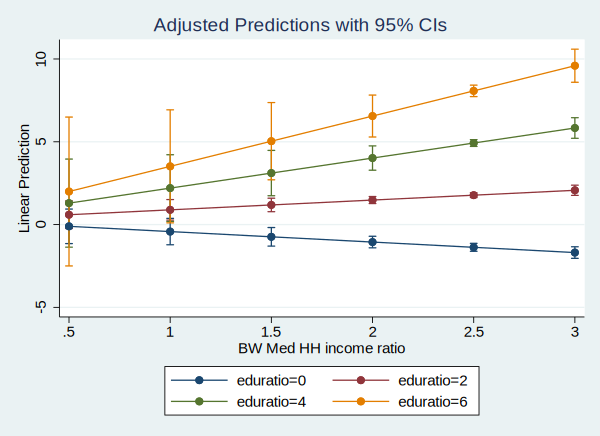

In [61]:
marginsplot

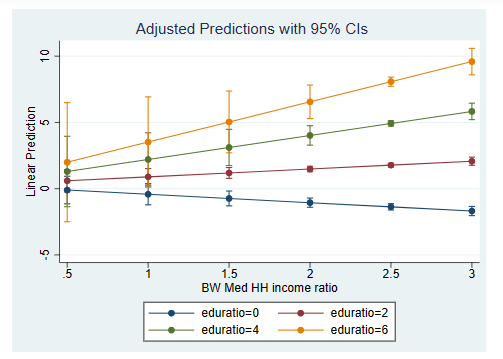

* Here we see the various slopes for each degree of Black-white lack of education attainment (aka edu inequality). Higher numbers mean higher Black-white educational attainment.
* We see as Black-white educational inequality increases the slope gets more steeply positive.
* The slope represents the relationship between Black-white income inequality and Black-white incarcerated women. Thus, as there is more educational inequality leads to a steeper relationship between income inequality and women incarceration.
* We can check the slopes:



Conditional marginal effects                    Number of obs     =         51
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : mhincratio
1._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               eduratio        =           0
               mhincratio      =    1.601328 (mean)
2._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
               2.region_n~c    =    .2352941 (mean)
               3.region_n~c    =    .3333333 (mean)
               4.region_n~c    =     .254902 (mean)
               eduratio        =           2
               mhincratio      =    1.601328 (mean)
3._at        : segscale        =    62.39505 (mean)
               1.region_n~c    =    .1764706 (mean)
           

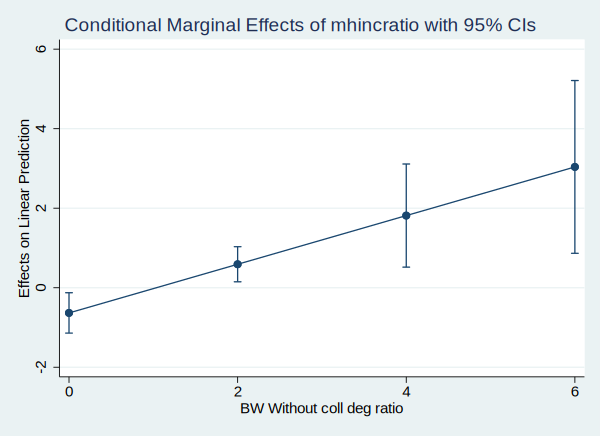

In [62]:
margins, dydx(mhincratio) at(eduratio=(0(2)6)) atmeans vsquish
marginsplot

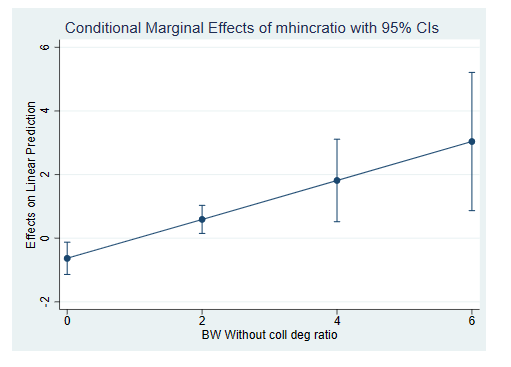